# Time series analysis : Lynx dataset

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
%matplotlib inline

In [11]:
lynx_df=pd.read_csv("LYNXdata.csv",names=['year', 'trappings'], index_col=0, header=0)

In [12]:
lynx_df

,trappings
year,
1821,269
1822,321
1823,585
1824,871
1825,1475
...,...
1930,662
1931,1000
1932,1590


In [13]:
lynx_df['trappings']

year
1821     269
1822     321
1823     585
1824     871
1825    1475
        ... 
1930     662
1931    1000
1932    1590
1933    2657
1934    3396
Name: trappings, Length: 114, dtype: int64

In [14]:
lynx_df.trappings

year
1821     269
1822     321
1823     585
1824     871
1825    1475
        ... 
1930     662
1931    1000
1932    1590
1933    2657
1934    3396
Name: trappings, Length: 114, dtype: int64

In [15]:
#Create a new dataframe with proper timestamps

In [16]:
newlynx_ts=pd.Series(lynx_df['trappings'].values, index=pd.date_range('31/12/1821', periods=114, freq='A-DEC'))

In [17]:
newlynx_ts

1821-12-31     269
1822-12-31     321
1823-12-31     585
1824-12-31     871
1825-12-31    1475
              ... 
1930-12-31     662
1931-12-31    1000
1932-12-31    1590
1933-12-31    2657
1934-12-31    3396
Freq: A-DEC, Length: 114, dtype: int64

Text(0,0.5,'Number of lynxes hunted')

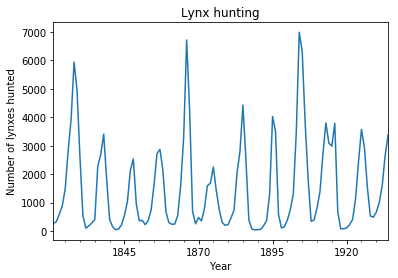

In [26]:

fig=newlynx_ts.plot()
fig.set_title("Lynx hunting")
fig.set_xlabel("Year")
fig.set_ylabel("Number of lynxes hunted")

In [18]:
#Test stationarity


In [31]:
len(newlynx_ts)

114

In [33]:
def stationarity_test(timeseries):
    """
    Augmented Dickey-Fuller test for stationarity
    """
    print("Dickey-Fuller test")
    #autolag -> the lag period is chosen automatically
    df_test=adfuller(timeseries,autolag='AIC')
    df_output=pd.Series(df_test[0:4], index=['Test statistic', 'p-value', '#Lags used','Number of observations'])
    print (df_output)
    
stationarity_test(newlynx_ts)

Dickey-Fuller test
Test statistic             -2.996304
p-value                     0.035241
#Lags used                  7.000000
Number of observations    106.000000
dtype: float64


In [34]:
#Test with normally distributed numbers, gerenrated randomly
stationarity_test(np.random.normal(1,3,300))

Dickey-Fuller test
Test statistic           -1.425972e+01
p-value                   1.433531e-26
#Lags used                1.000000e+00
Number of observations    2.980000e+02
dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


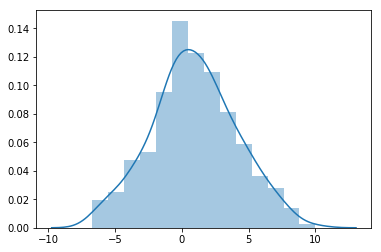

In [36]:
sns.distplot(np.random.normal(1,3,300))

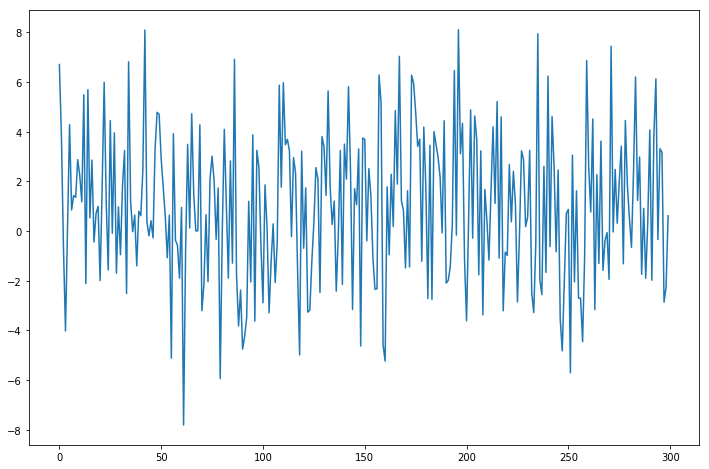

In [39]:
plt.figure(figsize=(12,8))
plt.plot(np.random.normal(1,3,300))

In [40]:
#Test application on a vector of numbers
mydata=(3, 5, 3, 65, 64, 64, 65, 643, 546, 546, 544)
stationarity_test(mydata)

Dickey-Fuller test


LinAlgError: SVD did not converge

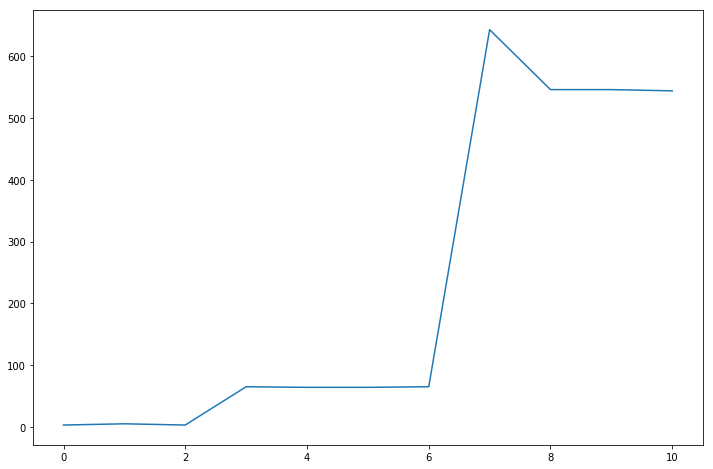

In [42]:
plt.figure(figsize=(12,8))
plt.plot(mydata)

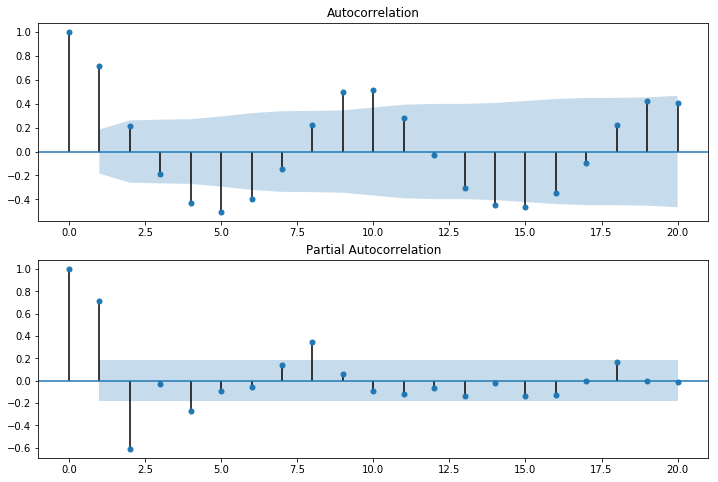

In [45]:
fig=plt.figure(figsize=(12,8))
ax1=fig.add_subplot(211)
fig=plot_acf(newlynx_ts, lags=20, ax=ax1)
ax2=fig.add_subplot(212)
fig=plot_pacf(newlynx_ts, lags=20, ax=ax2)

In [47]:
cumsum_lynx=np.cumsum(newlynx_ts)

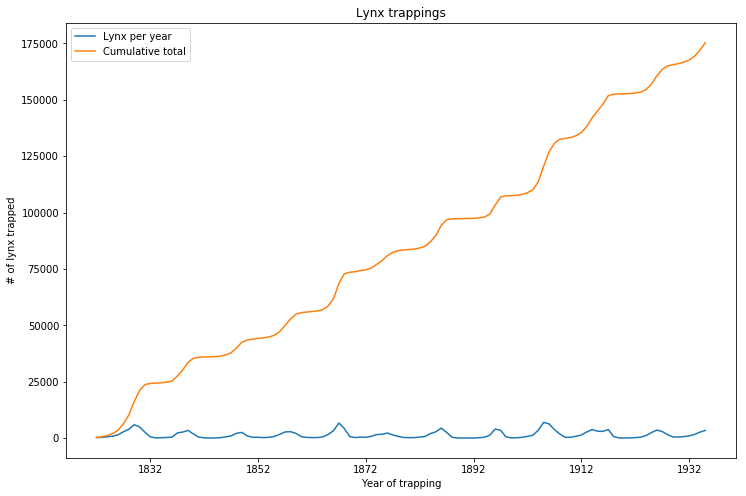

In [54]:
fig=plt.figure(figsize=(12,8))
plt.plot(newlynx_ts)
plt.plot(cumsum_lynx)
plt.title('Lynx trappings')
plt.xlabel('Year of trapping')
plt.ylabel('# of lynx trapped')
plt.legend(['Lynx per year', 'Cumulative total'])

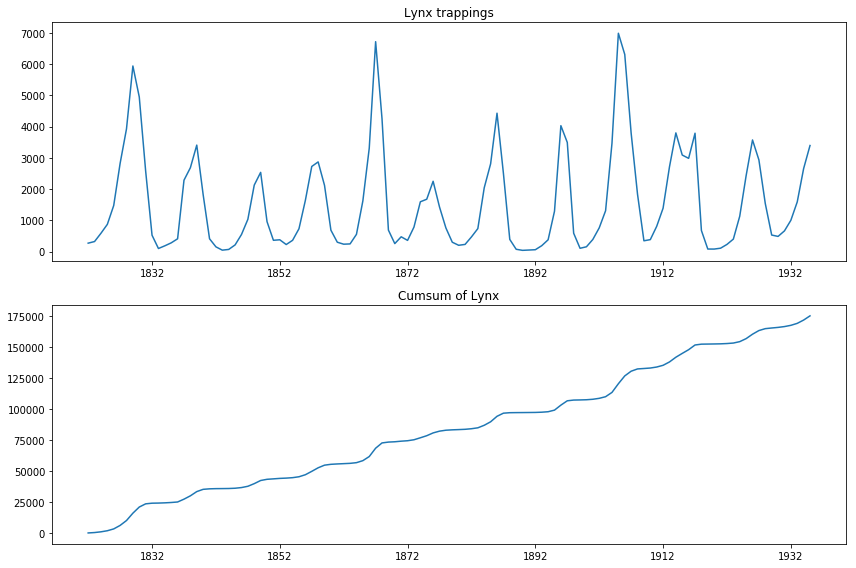

In [56]:
plt.figure(figsize=(12,8))
plt.subplot(2,1,1)
plt.plot(newlynx_ts)
plt.title('Lynx trappings')

plt.subplot(2,1,2)
plt.plot(cumsum_lynx)
plt.title('Cumsum of Lynx')
plt.tight_layout()

In [57]:
def plot_rolling(timeseries, window):
    rol_mean=timeseries.rolling(window).mean()
    rol_std=timeseries.rolling(window).std()
    fig=plt.figure(figsize=(12,8))
    og=plt.plot(timeseries, color='blue', label='Original')
    mean=plt.plot(rol_mean, color='red', label='Rolling Mean')
    std=plt.plot(rol_std, color='black', label='Rolling stdev')
    plt.legend(loc='best')
    plt.title("Rolling mean and standard deviation ( window = "+ str(window)+")")
    plt.show()

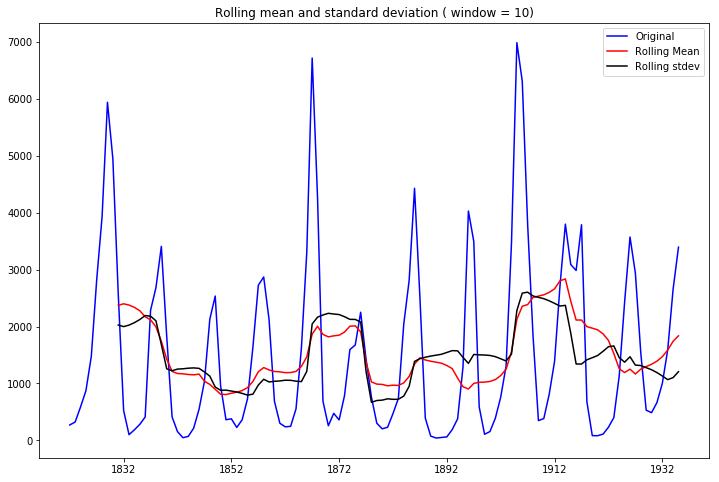

In [58]:
plot_rolling(newlynx_ts, 10)

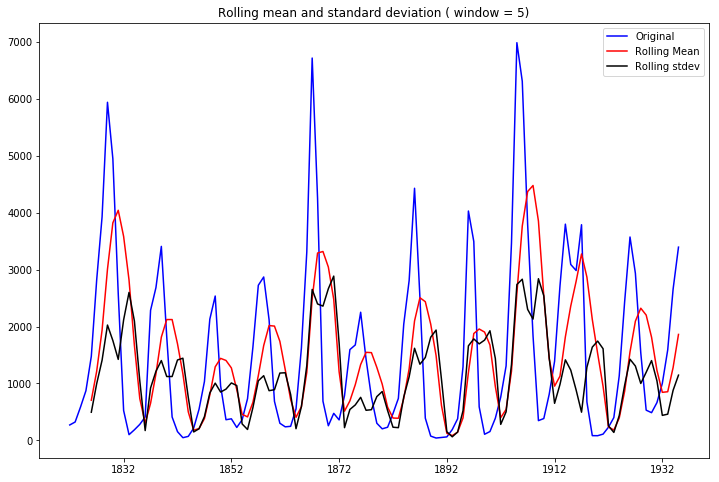

In [59]:
plot_rolling(newlynx_ts, 5)

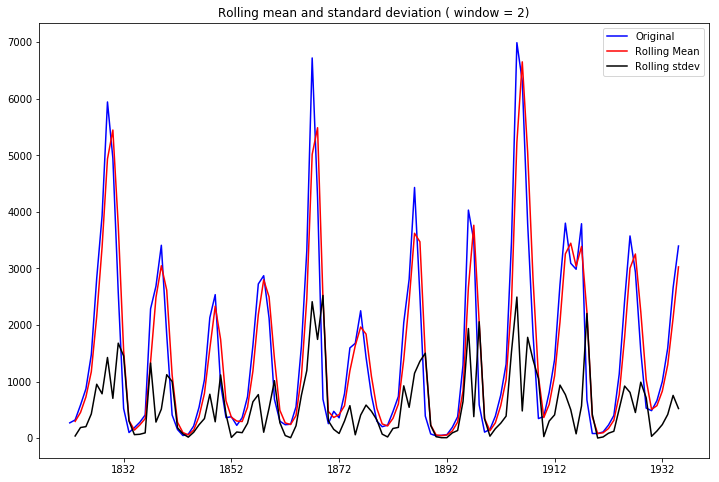

In [60]:
plot_rolling(newlynx_ts, 2)

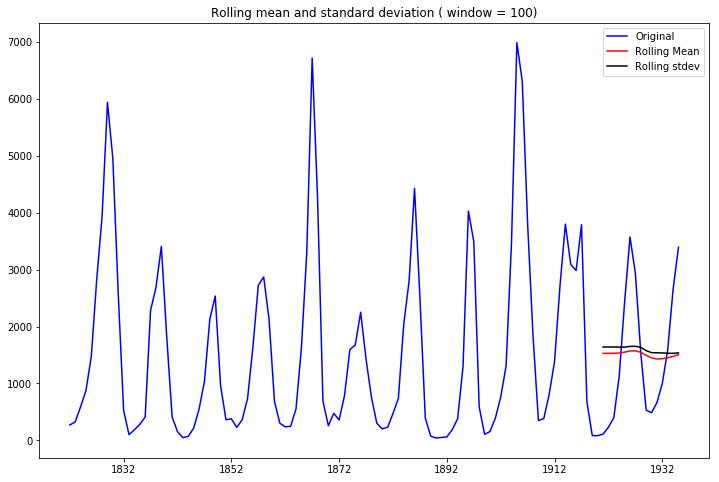

In [61]:
plot_rolling(newlynx_ts, 100)

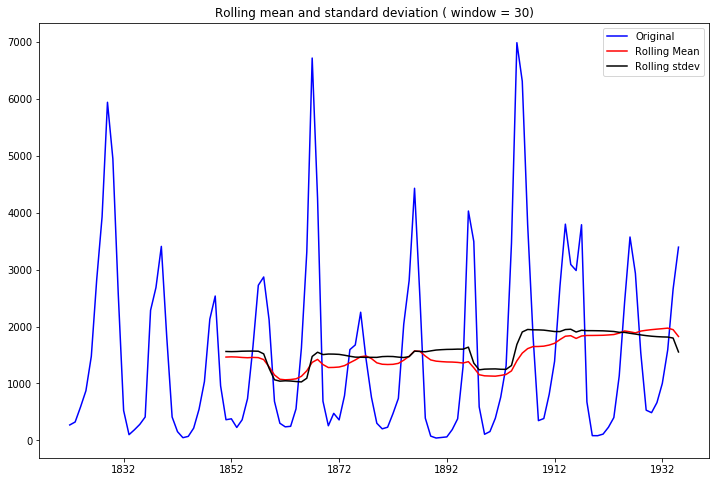

In [62]:
plot_rolling(newlynx_ts, 30)

In [67]:
rolling_m_10=newlynx_ts.rolling(10).mean().dropna()

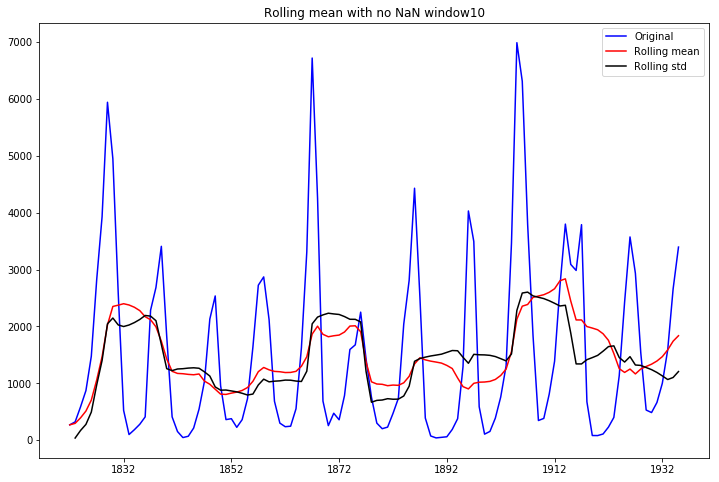

In [68]:
def plot_rolling2(timeseries,window):
    rol_mean=timeseries.rolling(window, min_periods = 1).mean()
    rol_std=timeseries.rolling(window, min_periods=1).std()
    fig=plt.figure(figsize=(12,8))
    og=plt.plot(timeseries, color='blue', label='Original')
    mean=plt.plot(rol_mean, color='red', label='Rolling mean')
    std=plt.plot(rol_std, color='black', label='Rolling std')
    plt.legend(loc='best')
    plt.title('Rolling mean with no NaN window'+str(window))
    
plot_rolling2(newlynx_ts,10)

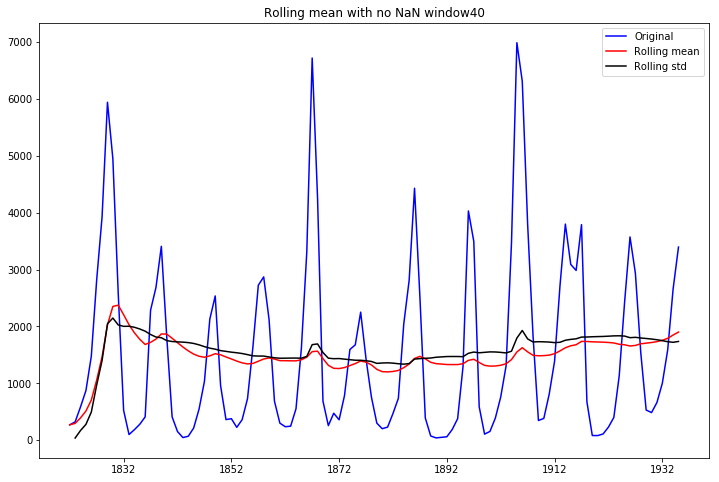

In [69]:
plot_rolling2(newlynx_ts,40)

In [71]:
newlynx_ts.rolling(30, min_periods=1).mean()

1821-12-31     269.000000
1822-12-31     295.000000
1823-12-31     391.666667
1824-12-31     511.500000
1825-12-31     704.200000
                 ...     
1930-12-31    1954.100000
1931-12-31    1962.166667
1932-12-31    1971.600000
1933-12-31    1944.666667
1934-12-31    1824.833333
Freq: A-DEC, Length: 114, dtype: float64

In [74]:
def plot_ewma(timeseries, alpha):
    expw_ma=timeseries.ewm(alpha=alpha).mean()
    fig = plt.figure(figsize=(12,8))
    og_line = plt.plot(timeseries, color='blue', label='Original')
    ewma_line=plt.plot(expw_ma, color="Red", label='EWMA')
    plt.legend(loc='best')
    plt.title("EWMA alpha" +str(alpha))
    plt.show()
    

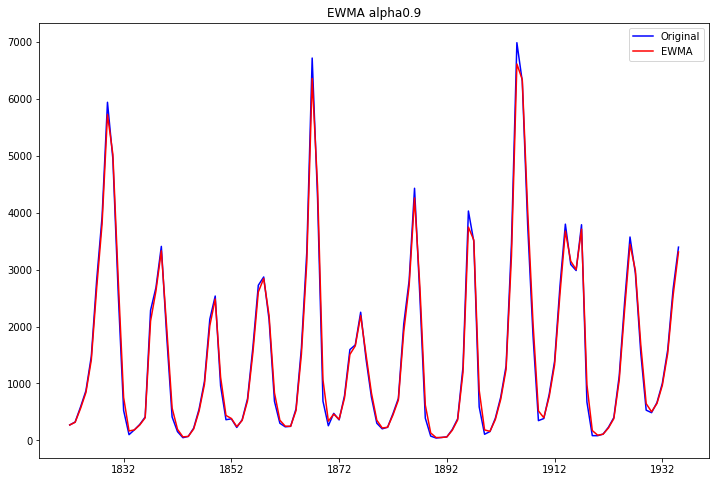

In [75]:
plot_ewma(newlynx_ts, 0.9)

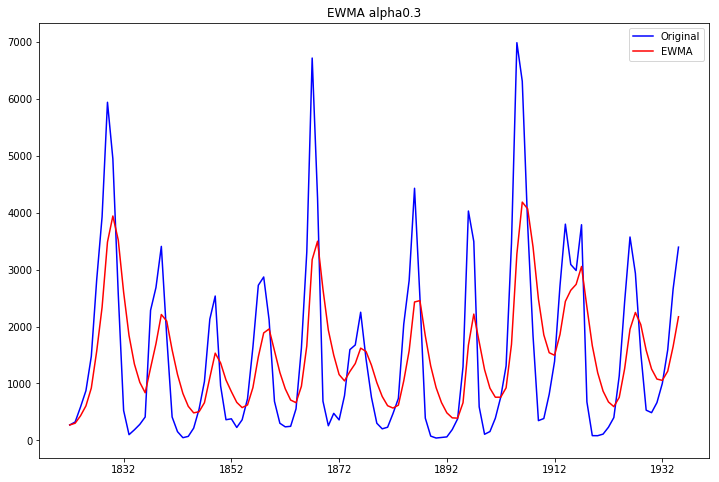

In [76]:
plot_ewma(newlynx_ts, 0.3)

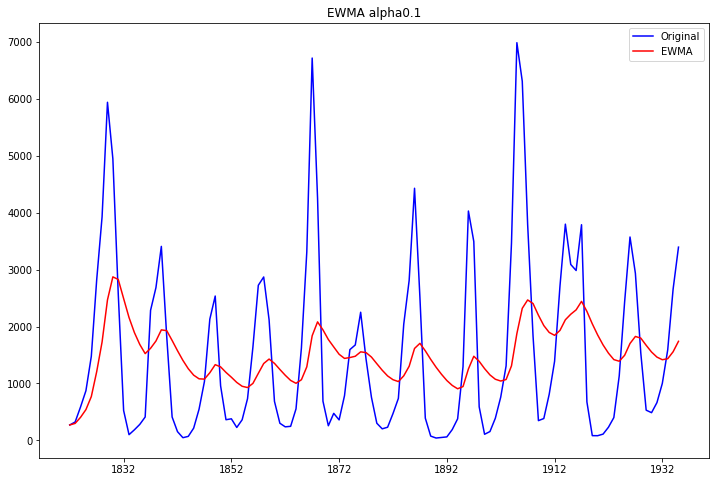

In [77]:
plot_ewma(newlynx_ts, 0.1)